In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.special as spec
import scipy.stats as st
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline

In [10]:
a = 1e-4
b = 1*1e-4
Qx0 = 0
pi2 = np.pi*2
def Qx(Qx0,a,b,Jx,Jy):
    return Qx0 + a*Jx + b*Jy

def intQx(Jy,Jx,Qx0,a,b,exp):
    return Qx(Qx0,a,b,Jx,Jy)**(exp)*np.exp(-Jx-Jy)

def func_g2(g):
    return g/2

def dQx(Jx,Jy,a,b):
    return a*(Jx-1) + b*(Jy-1)

def octu_leb(Jx,Jy,a,b,g):
    g2 = func_g2(g)
    dq = dQx(Jx,Jy,a,b)
    return pi2**2*(1-g2)**2*(dq)**2 / (pi2**2*(1-g2)*(dq)**2  + g2**2) *np.exp(-Jx-Jy)

Qm = integrate.nquad(intQx, [[0,100], [0,100]],args=(Qx0,a,b,1))[0]
Q2m= integrate.nquad(intQx, [[0,100], [0,100]],args=(Qx0,a,b,2))[0]


# g = lambda x: 0
# h = lambda x: 10
# integrate.dblquad(intQx, 0, 10, g, h, args=(Qx0,a,b))#, epsabs=1.49e-08, epsrel=1.49e-08)
print(a,b,Qm/a,Q2m/a**2, np.sqrt(Q2m-Qm**2)/a)
print(Qx(0,a,b,0,10))
print(dQx(0,10,a,b))

0.0001 0.0001 1.9999999999898346 6.000000173465652 1.41421362372
0.001
0.0008


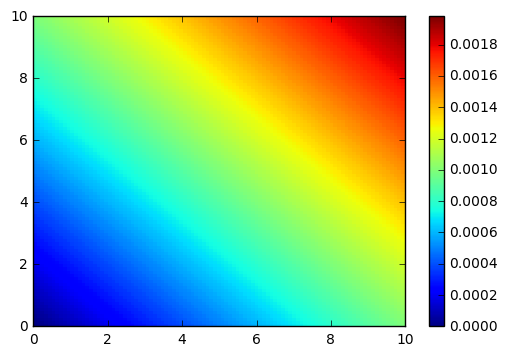

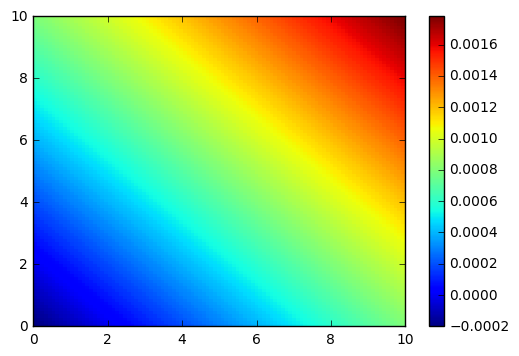

In [11]:
Jx = np.linspace(0,10,100)
JX,JY = np.meshgrid(Jx,Jx)

plt.figure()
plt.pcolor(JX,JY,Qx(0,a,b,JX,JY))
plt.colorbar()

plt.figure()
plt.pcolor(JX,JY,dQx(JX,JY,a,b))
plt.colorbar()

In [12]:
print(np.logspace(-5,-1,5))
print(np.logspace(-5,-1,13))


[  1.00000000e-05   1.00000000e-04   1.00000000e-03   1.00000000e-02
   1.00000000e-01]
[  1.00000000e-05   2.15443469e-05   4.64158883e-05   1.00000000e-04
   2.15443469e-04   4.64158883e-04   1.00000000e-03   2.15443469e-03
   4.64158883e-03   1.00000000e-02   2.15443469e-02   4.64158883e-02
   1.00000000e-01]


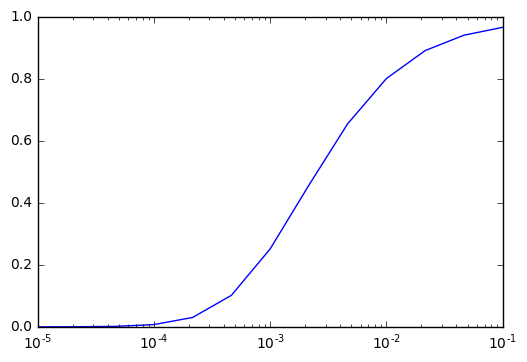

In [13]:
As = np.logspace(-5,-1,13)
lebs = np.zeros_like(As)
g = 0.02
for i,a in enumerate(As):
    b = -a
    lebs[i] = integrate.nquad(octu_leb, [[0,np.inf], [0,np.inf]],args=(a,b,g))[0]
    
plt.figure()
plt.semilogx(As,lebs)

# math

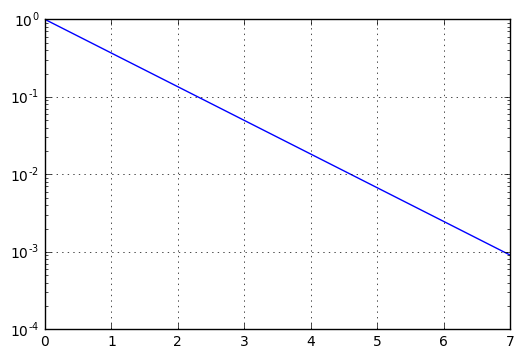

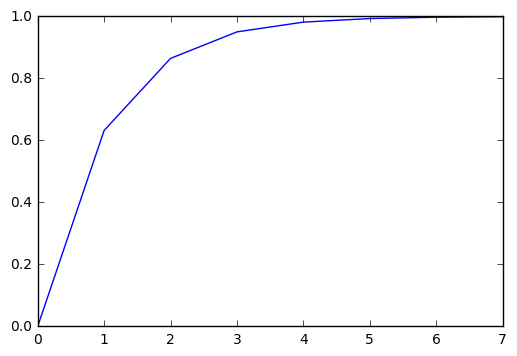

In [17]:
x = np.arange(8)
plt.figure()
plt.semilogy(x,np.exp(-x))
plt.grid(True)
plt.figure()
plt.figure()
plt.plot(x,1-np.exp(-x))

# Error function

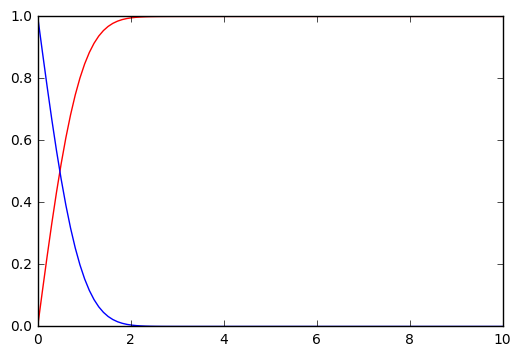

In [2]:
x = np.linspace(0,10,100)

f1 = spec.erf(x)
f2 = spec.erfc(x)

plt.figure()
plt.plot(x,f1,'r')
plt.plot(x,f2,'b')